In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('/Users/fmassin/Google Drive/Projects/Collaboration/Behr/vssc3_scripts/') 
import scdtv
figure_directory = 'experience_3' 
if not os.path.exists(figure_directory) : os.makedirs(figure_directory)   

/Users/fmassin/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
prefix='/Users/fmassin/Google Drive/Projects/SED-EEW/INETER/system-maintenance/delays/experience_3/data/192.168.44.177/'
fdata = prefix+'2016-11-17_19-30-28_data_latencies_1hrs.sqlite3'
fenvel = prefix+'2016-11-21_17-00-00_envelop_log_1hrs/envelope-logging-info.log*'
fpick = prefix+'2016-11-18_18-43-55_data_picks_90days_Trigger.txt'
finv = prefix+'inventory-completed.xml'
figsizes=[(14,6),(16,6)]

# Delays Analysis
The delays are measured at 4 levels in the EEW pipeline. Namely, there are:
- waveforms data acquisition, 
- amplitudes envelopes,
- waves arrivals picks,
- origines.

We first need an inventory with all station informations to analyse the delay in term of all variables in the station settings. The inventory used for seiscomp3 need to be extended with a table that includes telemetry, datalogger and sensor descriptions.

In [3]:
reload(scdtv)
inventory = scdtv.boost_inventory(file=finv)

Boosted inventory read from file.
('Writes', '/Users/fmassin/Google Drive/Projects/SED-EEW/INETER/system-maintenance/delays/experience_3/data/192.168.44.177/inventory-completed.xml')


`inventory` now contains the inventory installed in seiscomp at sc-local-proc-1 and the station informations. 
## Waveforms delays
The waveform delays coming from sc-acquisition-1 have been sampled during an hour on sc-local-proc-2 on 2016/11/17. 

### Waveform delays as a function of networks

<IPython.core.display.Javascript object>


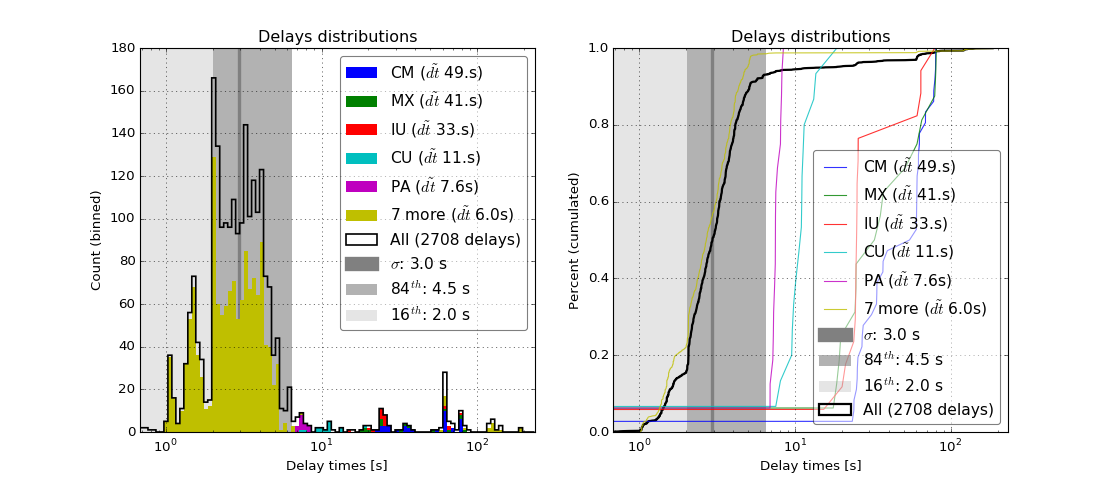

In [6]:
reload(scdtv)
delays = scdtv.get_data_latencies(fdata)
f, (ax1, ax2) = plt.subplots(1,2, figsize=figsizes[0])
inventories=scdtv.hist(delays, networks=['*'], hists_types='barstacked',hists='', ax=ax1,norms_hists=False)#, fout='test')
inventories=scdtv.hist(delays, networks=['*'], hists='c', ax=ax2, norms_hists=True)#, fout='test')
plt.savefig(figure_directory+'/data-delay_net.pdf', bbox_inches='tight')

In [7]:
print(inventories[-1])

IndexError: list index out of range

We will focus on the **NU** network.
### Waveform delays as a function of sampling rates

In [8]:
delays = scdtv.get_data_latencies(fdata, networks=['NU'])

`delays` now containes the waveform delays of network **NU**. Looking at delays as a function of sample rates allows use to verify that we get a correct representation.

<IPython.core.display.Javascript object>


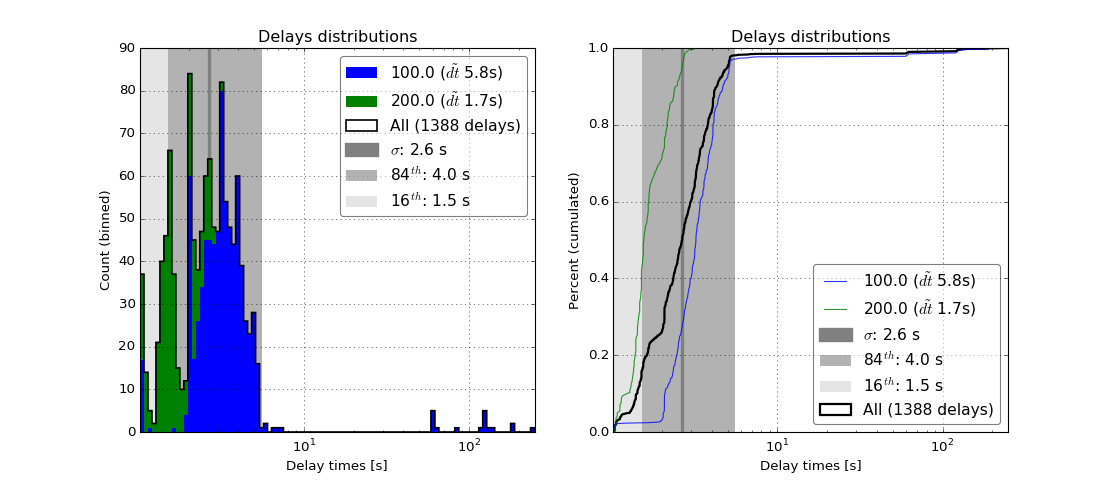

In [9]:
f, (ax1, ax2) = plt.subplots(1,2,  sharey=False, figsize=figsizes[0])
inventories=scdtv.hist(delays, inventory=inventory,  sample_rates=['*'], hists_types='barstacked',hists='', ax=ax1,norms_hists=False)#, fout='test')
inventories=scdtv.hist(delays, inventory=inventory,  sample_rates=['*'], hists='c', norms_hists=True, ax=ax2)
plt.savefig(figure_directory+'/data-delay_sample.pdf', bbox_inches='tight')
inventories[-1].write(prefix+'best1-inventory.kml', format='kml')
inventories[-2].write(prefix+'best2-inventory.kml', format='kml')
inventories[-1].write(prefix+'best1-inventory.xml', format='STATIONXML')
inventories[-2].write(prefix+'best2-inventory.xml', format='STATIONXML')

The histogrames shown are normalised so we can observed delays independently from their respective pool sizes. Cumulated histogrames are less conventionnal but as they are also normalized they clearly highlight the difference between sub-networks.
Thereafter only cumulated histogram are represented.
### Waveform delays as a function of sensors

<IPython.core.display.Javascript object>


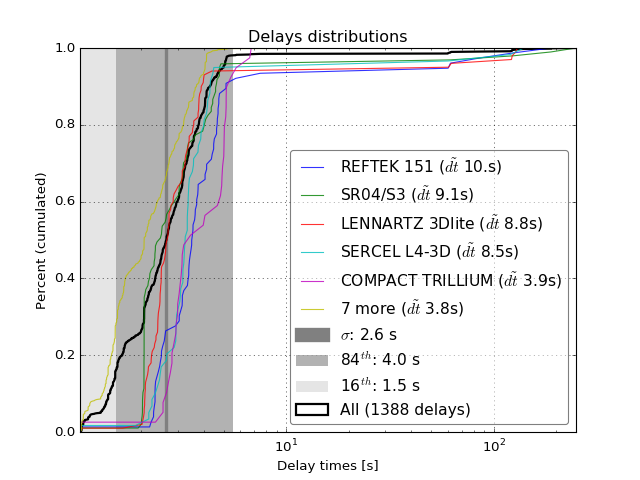

In [10]:
inventories = scdtv.hist(delays, inventory=inventory,  sensors=['*'], hists='c', norms_hists=True)#, fout='test')
plt.savefig(figure_directory+'/data-delay_sensors.pdf', bbox_inches='tight')

The sub-network of `STS-2` (printed below) seems to produce significately slower. It does include one **HH** component but only one station.

In [11]:
print(inventories[0])

Inventory created at 2016-12-01T22:21:37.000000Z
	Created by: None
		    None
	Sending institution: REFTEK 151 ($\~{dt}$ 10.s) (INETER)
	Contains:
		Networks (1):
			NU
		Stations (4):
			NU.APQN (BB Volcan Apoyeque, Nicaragua)
			NU.HUEN (BB Puenta Huete, Nicaragua)
			NU.LIMN (Finca el Limon)
			NU.SAPN (BB Ciudad Sandino San Andres de las Palancas, Nicaragua)
		Channels (12):
			NU.APQN..HHE, NU.APQN..HHN, NU.APQN..HHZ, NU.HUEN..HHE,
			NU.HUEN..HHN, NU.HUEN..HHZ, NU.LIMN..HHE, NU.LIMN..HHN,
			NU.LIMN..HHZ, NU.SAPN..HHE, NU.SAPN..HHN, NU.SAPN..HHZ


### waveform delays as a function of data loggers

<IPython.core.display.Javascript object>


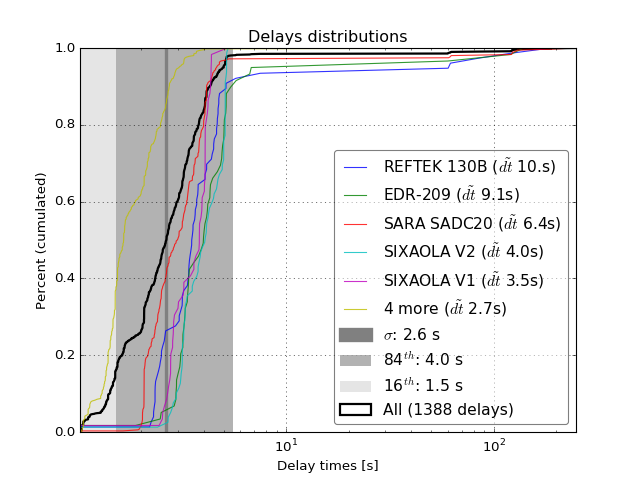

In [13]:
inventories=scdtv.hist(delays, inventory=inventory,  data_loggers=['*'], hists='c', norms_hists=True)
plt.savefig(figure_directory+'/data-delay_loggers.pdf', bbox_inches='tight')

There no clear ousider in amongst dataloggers.
### Waveform delays as a function of telemetries

<IPython.core.display.Javascript object>


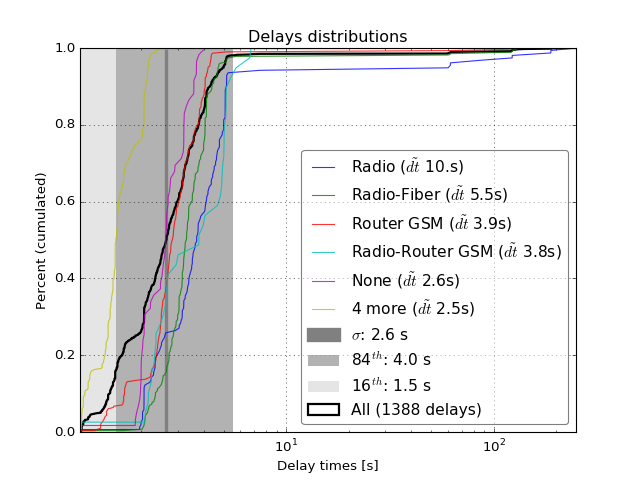

In [14]:
inventories=scdtv.hist(delays, inventory=inventory,  telemetries=['*'], hists='c', norms_hists=True)
plt.savefig(figure_directory+'/data-delay_tele.pdf', bbox_inches='tight')

The `Radio-Router GSM` sub-network is somehow less fast than the other. The `Radio` is the second worst.
### In map view
The `Radio-Router GSM` sub-network is in a remote area, it is not of big importance for EEW.

<IPython.core.display.Javascript object>


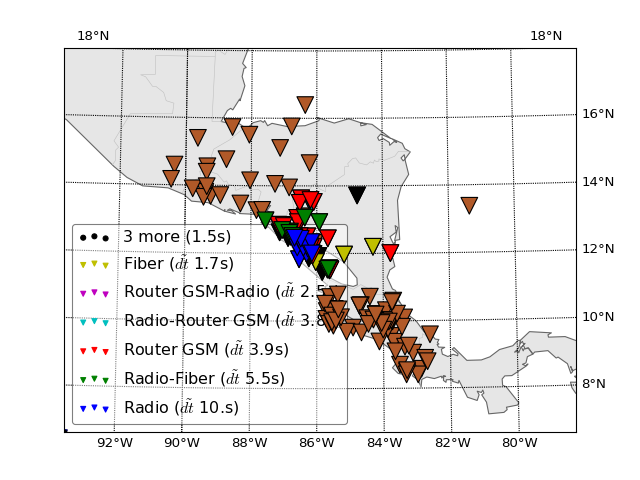

In [15]:
inventories_keep=inventories=scdtv.maps(delays, inventory=inventory,  telemetries=['*'])#, saves=True)
plt.savefig(figure_directory+'/data-delay_map-all.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


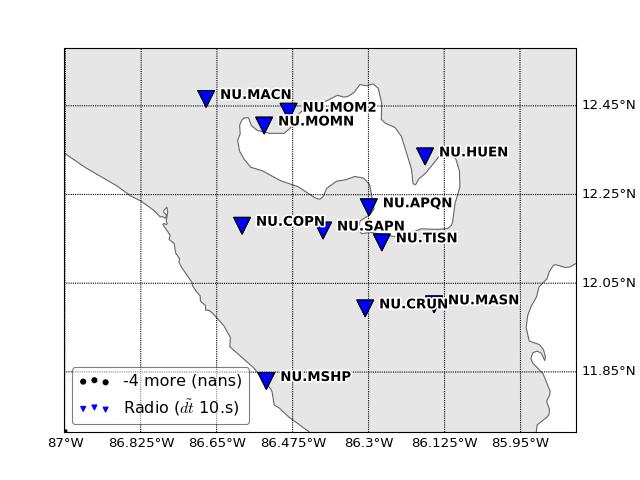

In [16]:
inventories=scdtv.maps(delays, inventory=inventories_keep[0],  telemetries=['*'], resolution='h')
plt.savefig(figure_directory+'/data-delay_map.pdf', bbox_inches='tight')

But the `Radio` network is in the central area. And, as shown below, it includes **EH** and **HH** components. It is a very important portion of the **NU** network and it could be better. 

In [17]:
print(inventories_keep[0])

Inventory created at 2016-12-01T22:21:37.000000Z
	Created by: None
		    None
	Sending institution: Radio ($\~{dt}$ 10.s) (INETER)
	Contains:
		Networks (1):
			NU
		Stations (11):
			NU.APQN (BB Volcan Apoyeque, Nicaragua)
			NU.COPN (Copaltepe)
			NU.CRUN (El Crucero)
			NU.HUEN (BB Puenta Huete, Nicaragua)
			NU.MACN (El Madrono, SAT Cerro Negro)
			NU.MASN (Volcan Masaya, Nicaragua)
			NU.MOM2 (El cardon, Momotombo, NIcaragua)
			NU.MOMN (al SSO del Volcan Momtombo)
			NU.MSHP (Al O del Volcan Concepcion)
			NU.SAPN (BB Ciudad Sandino San Andres de las Palancas, Nicaragua)
			NU.TISN (Estado Mayor, Ejercito Nacional)
		Channels (27):
			NU.APQN..HHE, NU.APQN..HHN, NU.APQN..HHZ, NU.COPN.00.EHZ,
			NU.CRUN.00.EHZ, NU.HUEN..HHE, NU.HUEN..HHN, NU.HUEN..HHZ,
			NU.MACN.00.EHE, NU.MACN.00.EHN, NU.MACN.00.EHZ, NU.MASN.50.EHE,
			NU.MASN.50.EHN, NU.MASN.50.EHZ, NU.MOM2.00.EHE, NU.MOM2.00.EHN,
			NU.MOM2.00.EHZ, NU.MOMN.00.EHE, NU.MOMN.00.EHN, NU.MOMN.00.EHZ,
			NU.MSHP.00.EHE, NU.MSHP.00.E

The observations above should be consistent with envelope and pick delays.
## Envelope delays

In [18]:
delays, first, last = scdtv.envelope_delays(fenvel,new=False, networks=['NU'])

### Envelope delays as a function of networks

<IPython.core.display.Javascript object>


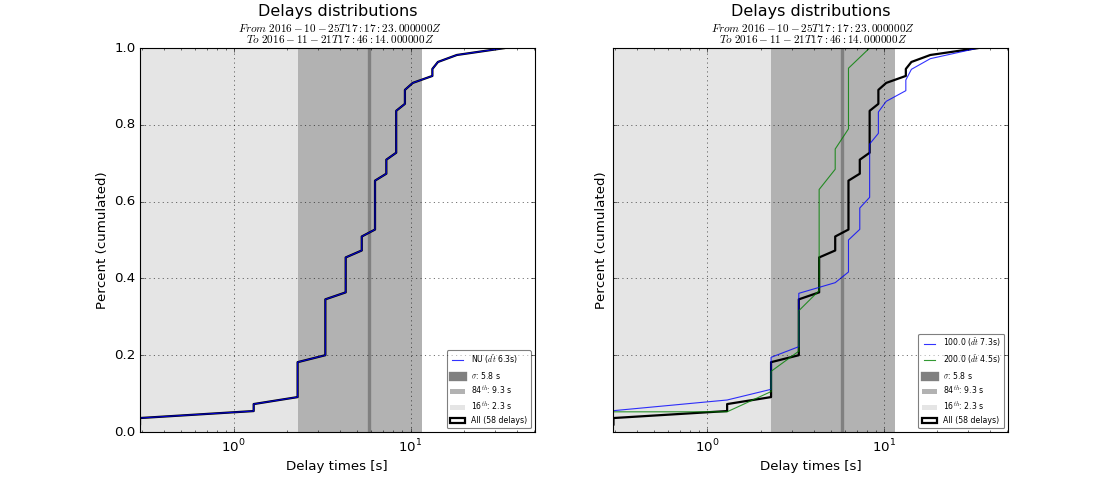

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=figsizes[0])
inventories=scdtv.hist(delays, ax=ax1, fsize=7, inventory=inventory,  networks=['*'], hists='c', norms_hists=True, first=first, last=last)
delays, first, last = scdtv.envelope_delays(fenvel,new=False, networks=['NU'])
inventories=scdtv.hist(delays, ax=ax2, fsize=7, inventory=inventory,  sample_rates=['*'], hists='c', norms_hists=True, first=first, last=last)
plt.savefig(figure_directory+'/envel-delay_net-sample.pdf', bbox_inches='tight')

We will focus on the **NU** network.
### Envelope delays as a function of telemetries, data loggers and sensors

<IPython.core.display.Javascript object>


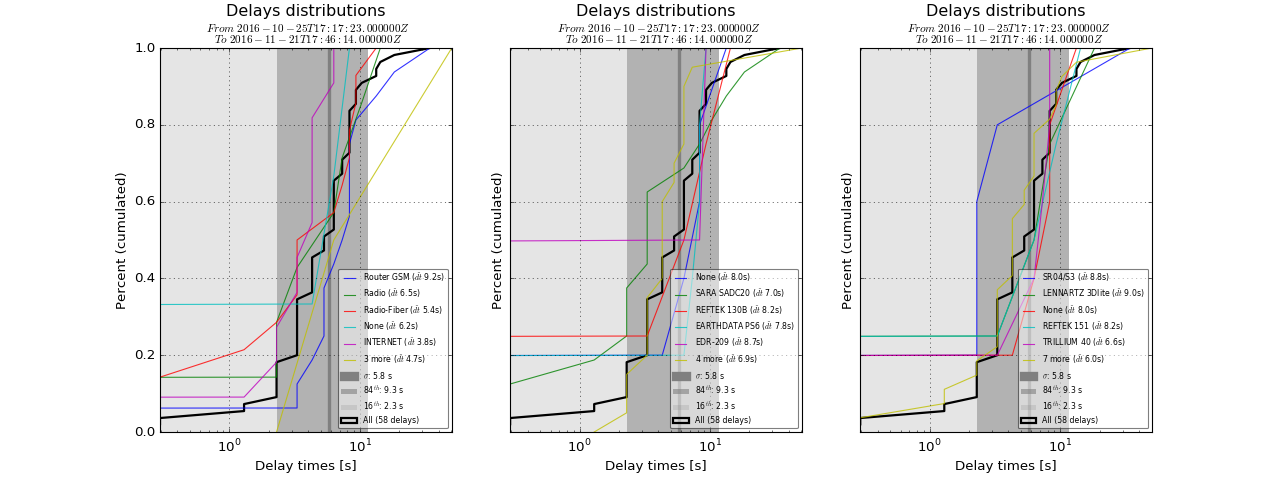

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=figsizes[1])
inventories=scdtv.hist(delays, ax=ax1, fsize=7, inventory=inventory,  telemetries=['*'], hists='c', norms_hists=True, first=first, last=last)
inventories=scdtv.hist(delays, ax=ax2, fsize=7, inventory=inventory,  data_loggers=['*'], hists='c', norms_hists=True, first=first, last=last)
inventories=scdtv.hist(delays, ax=ax3, fsize=7, inventory=inventory,  sensors=['*'], hists='c', norms_hists=True, first=first, last=last)
plt.savefig(figure_directory+'/envel-delay_allothers.pdf', bbox_inches='tight')

The observations above should be consistent with pick delays.
## Pick delays

In [21]:
delays, first, last, picktimes = scdtv.get_pick_delays(fpick,new=False, networks=['NU'])

### Picks delays as a function of networks and sample rates

<IPython.core.display.Javascript object>


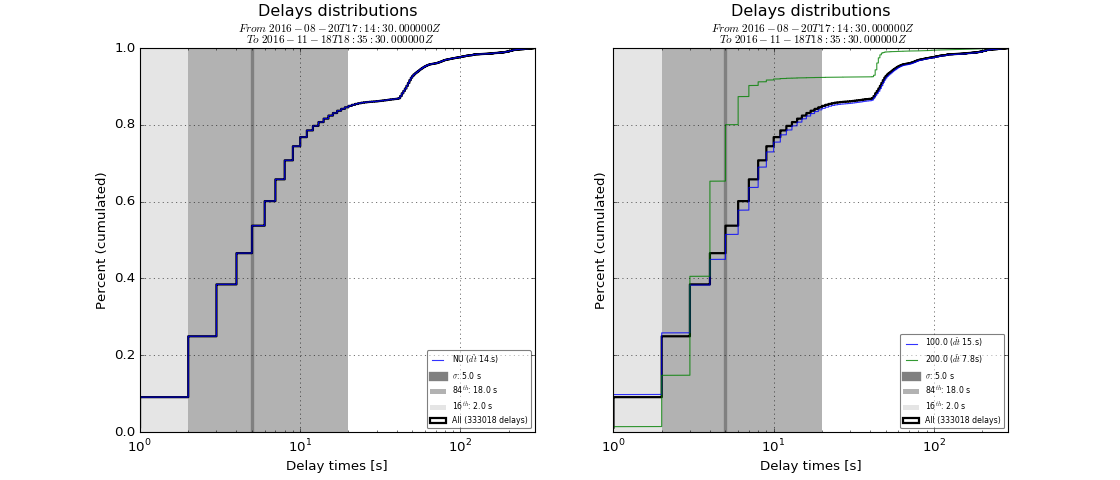

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=figsizes[0])
inventories=scdtv.hist(delays, ax=ax1, fsize=7, inventory=inventory,  networks=['*'], hists='c', norms_hists=True, first=first, last=last)
delays, first, last, picktimes = scdtv.get_pick_delays(fpick,new=False, networks=['NU'])
inventories=scdtv.hist(delays, ax=ax2, fsize=7, inventory=inventory,  sample_rates=['*'], hists='c', norms_hists=True, first=first, last=last)
plt.savefig(figure_directory+'/pick-delay_net-sample.pdf', bbox_inches='tight')

We will focus on the **NU** network.
### Picks delays as a function of telemetries, data loggers and sensors

<IPython.core.display.Javascript object>


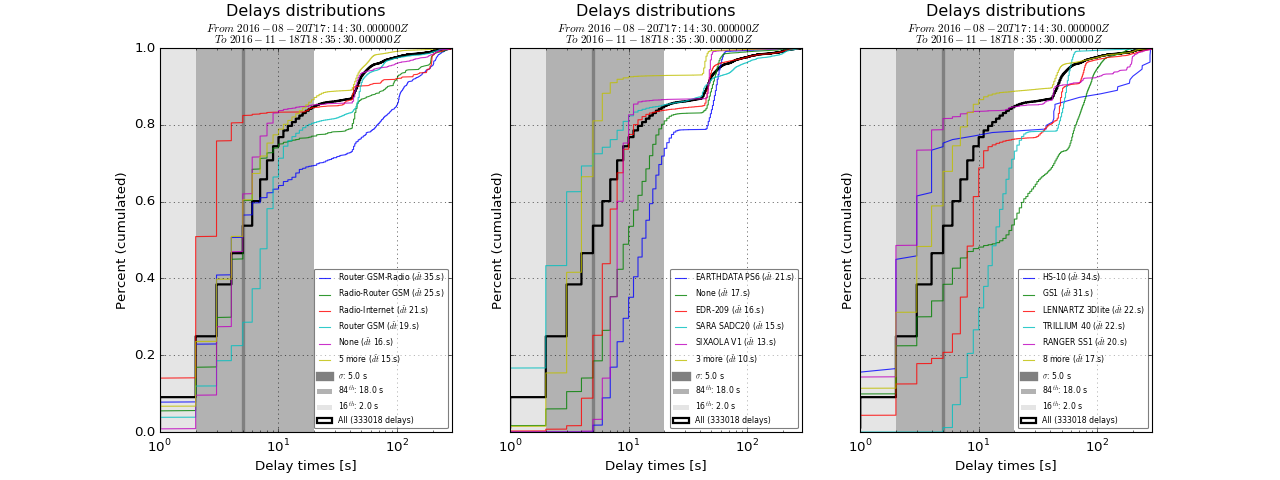

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=figsizes[1])
inventories_tele=scdtv.hist(delays, ax=ax1, fsize=7, inventory=inventory,  telemetries=['*'], hists='c', norms_hists=True, first=first, last=last)
inventories_log=scdtv.hist(delays, ax=ax2, fsize=7, inventory=inventory,  data_loggers=['*'], hists='c', norms_hists=True, first=first, last=last)
inventories_sens=scdtv.hist(delays, ax=ax3, fsize=7, inventory=inventory,  sensors=['*'], hists='c', norms_hists=True, first=first, last=last)
plt.savefig(figure_directory+'/pick-delay_allothers.pdf', bbox_inches='tight')

Delays are higher and more dispersed at the pick level than at the envelope level. The problemac sub-networks at the pick level are printed below.

In [24]:
print(inventories_tele[0]) 
print(inventories_log[1])
print(inventories_sens[1])

Inventory created at 2016-12-01T22:21:37.000000Z
	Created by: None
		    None
	Sending institution: Router GSM-Radio ($\~{dt}$ 35.s) (INETER)
	Contains:
		Networks (1):
			NU
		Stations (1):
			NU.OMEN (Al SSO del Volcan Concepcion)
		Channels (3):
			NU.OMEN.00.EHE, NU.OMEN.00.EHN, NU.OMEN.00.EHZ
Inventory created at 2016-12-01T22:21:37.000000Z
	Created by: None
		    None
	Sending institution: EDR-209 ($\~{dt}$ 16.s) (INETER)
	Contains:
		Networks (1):
			NU
		Stations (5):
			NU.NANN (Nandasmo, Nicaragua)
			NU.RCON (San Jose del Ojoche, San Juan de Rio Coco, Nicaragua)
			NU.RCPN (Sur Rio San Juan del Rio Coco)
			NU.RCVN (varillal2)
			NU.SIUN (SIUNA)
		Channels (33):
			NU.NANN..BHE, NU.NANN..BHN, NU.NANN..BHZ, NU.NANN..HHE,
			NU.NANN..HHN, NU.NANN..HHZ, NU.NANN..LHE, NU.NANN..LHN,
			NU.NANN..LHZ, NU.NANN..VHE, NU.NANN..VHN, NU.NANN..VHZ,
			NU.RCON..BHE, NU.RCON..BHN, NU.RCON..BHZ, NU.RCON..HHE,
			NU.RCON..HHN, NU.RCON..HHZ, NU.RCON..LHE, NU.RCON..LHN,
			NU.RCON..LHZ, NU.RCO

# Summary

In [25]:
reload(scdtv)
delays_data = scdtv.get_data_latencies(fdata, networks=['NU'])
delays_picks, first, last, picktimes = scdtv.get_pick_delays(fpick,new=False, networks=['NU'])

In [26]:
delays_env, first, last = scdtv.envelope_delays(fenvel,new=False, networks=['NU'])

<IPython.core.display.Javascript object>


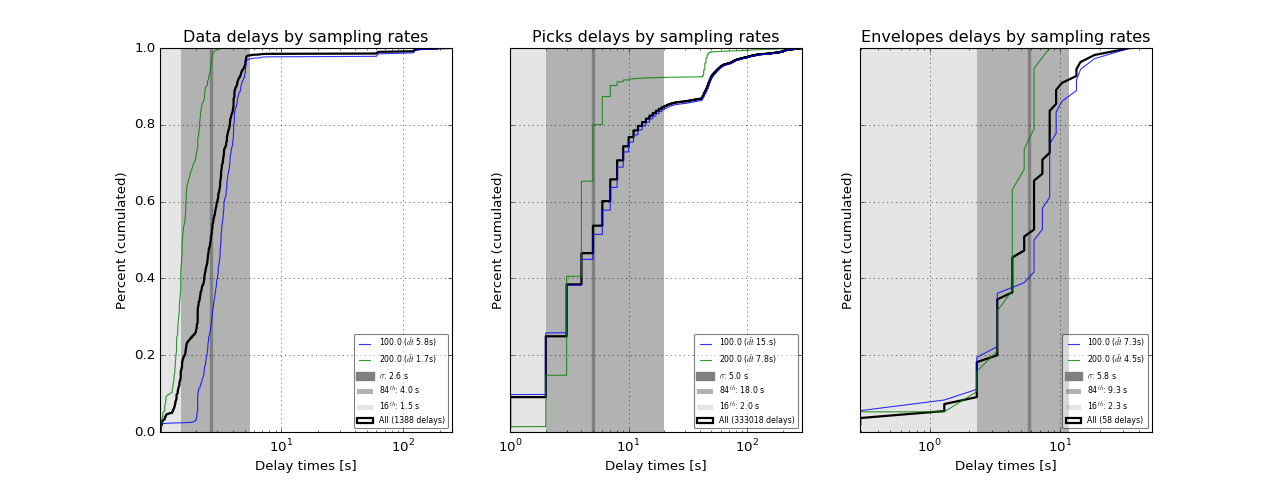

<IPython.core.display.Javascript object>


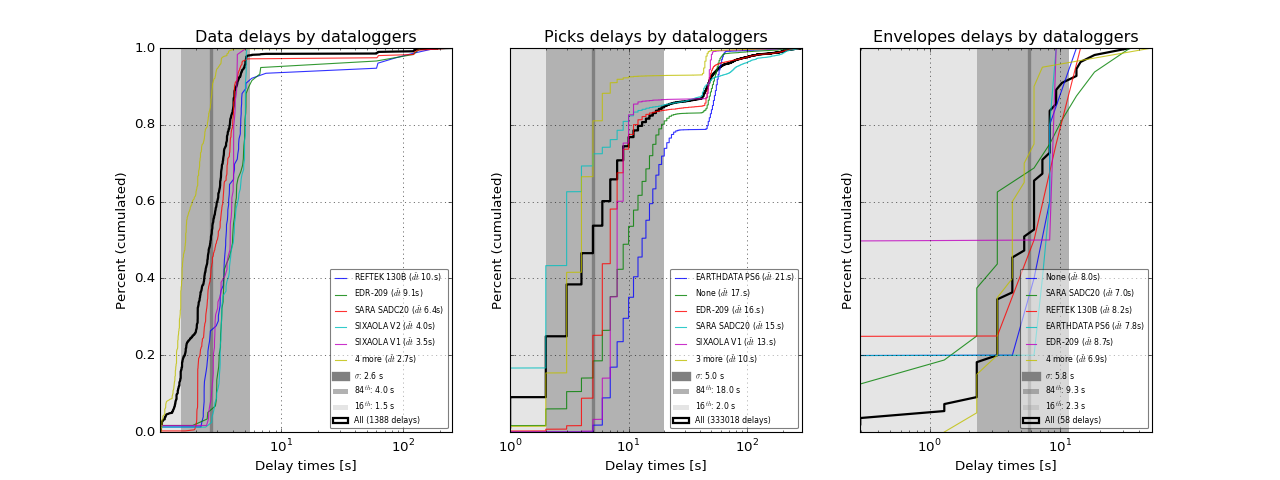

<IPython.core.display.Javascript object>


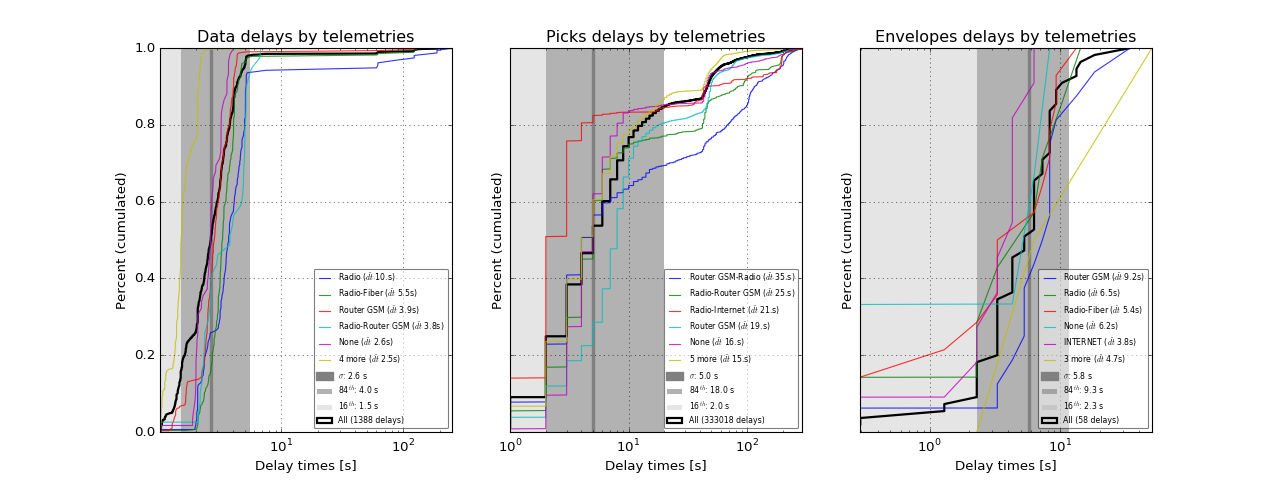

In [27]:
f1, (ax1, ax2, ax3) = plt.subplots(1,3,  sharey=True, figsize=figsizes[1])

inventories=scdtv.hist(delays_data, fsize=7, inventory=inventory,  sample_rates=['*'],hists='c', ax=ax1,norms_hists=True)#, fout='test')
inventories_log=scdtv.hist(delays_picks, ax=ax2, fsize=7, inventory=inventory,  sample_rates=['*'], hists='c', norms_hists=True)#, first=first, last=last)
inventories_log=scdtv.hist(delays_env, ax=ax3, fsize=7, inventory=inventory,  sample_rates=['*'], hists='c', norms_hists=True)#, first=first, last=last)
ax1.set_title(r'Data delays by sampling rates')
ax2.set_title(r'Picks delays by sampling rates')
ax3.set_title(r'Envelopes delays by sampling rates')
plt.savefig(figure_directory+'/data-pick-env-spr.pdf', bbox_inches='tight')

f2, (ax4, ax5, ax6) = plt.subplots(1,3,  sharey=True, figsize=figsizes[1])
inventories=scdtv.hist(delays_data, fsize=7, inventory=inventory,  data_loggers=['*'],hists='c', ax=ax4,norms_hists=True)#, fout='test')
inventories_log=scdtv.hist(delays_picks, ax=ax5, fsize=7, inventory=inventory,  data_loggers=['*'], hists='c', norms_hists=True)#, first=first, last=last)
inventories_log=scdtv.hist(delays_env, ax=ax6, fsize=7, inventory=inventory,  data_loggers=['*'], hists='c', norms_hists=True)#, first=first, last=last)
ax4.set_title(r'Data delays by dataloggers')
ax5.set_title(r'Picks delays by dataloggers')
ax6.set_title(r'Envelopes delays by dataloggers')
plt.savefig(figure_directory+'/data-pick-env-dataloggers.pdf', bbox_inches='tight')

f2, (ax4, ax5, ax6) = plt.subplots(1,3,  sharey=True, figsize=figsizes[1])
inventories=scdtv.hist(delays_data, fsize=7, inventory=inventory,  telemetries=['*'],hists='c', ax=ax4,norms_hists=True)#, fout='test')
inventories_log=scdtv.hist(delays_picks, ax=ax5, fsize=7, inventory=inventory,  telemetries=['*'], hists='c', norms_hists=True)#, first=first, last=last)
inventories_log=scdtv.hist(delays_env, ax=ax6, fsize=7, inventory=inventory,  telemetries=['*'], hists='c', norms_hists=True)#, first=first, last=last)
ax4.set_title(r'Data delays by telemetries')
ax5.set_title(r'Picks delays by telemetries')
ax6.set_title(r'Envelopes delays by telemetries')
plt.savefig(figure_directory+'/data-pick-env-telem.pdf', bbox_inches='tight')

# Amplitude analysis
The amplitude misfits should highligth the inconsistent calibration metadata. 